# Numpy

Numpy (numerical Python) is a tool suitable for several tasks that are important in data science applications
- fast array-oriented arithmetic operations
- efficient descriptive statistics and data aggregation
- linear algebra

The basic object in Numpy is the **N-dimensional array**, or `ndarray`. Unlike Python lists or tuples, ndarrays contain objects of the same type. Because of that, ndarrays occupy less space than Python built-in types and allow a much more efficient implementation of array operations.

In [1]:
import numpy as np

In [2]:
a = np.array([1,2,3,4]) # note that a list is provided as argument to the type constructor
a

array([1, 2, 3, 4])

In [3]:
type(a)

numpy.ndarray

We can inspect the type of the objects inside a ndarray via the attribute `dtype`.

In [4]:
a.dtype

dtype('int64')

The `dtype` of a ndarray can be re-cast using the method `astype()`.

In [5]:
float_a = a.astype(np.float64)
float_a

array([1., 2., 3., 4.])

The ndarray attribute `shape` contains the dimensions on the ndarray. In this case, `a` is a 1-dimensional array with four components

In [6]:
a.shape

(4,)

ndarray elements can be accessed via the indexing operator. Sections of ndarrays can be selected using *slicing*. 

In [7]:
a = np.arange(10) # same as np.array([0,1,2,3,4,5,6,7,8,9])
a[2:8:2] # from a[2] to a[7] with stepsize 2

array([2, 4, 6])

Slicing of ndarrays works similarly to Python lists. However, in Numpy we can assign a constant to a slice.

In [8]:
a[2:5] = 10 # all the slice elements get assigned the same value 10
a

array([ 0,  1, 10, 10, 10,  5,  6,  7,  8,  9])

Slicing in Numpy creates a **view** of the ndarray being sliced. A view is a new object whose value (i.e., the content of the ndarray) is *shared* with the content of the original array.

In [9]:
a = np.arange(10)
b = a             # a and b refer to the same object
c = a[:]          # c is a view of a
b[4] = 10
c[5] = 11
a

array([ 0,  1,  2,  3, 10, 11,  6,  7,  8,  9])

The attribute `base` of a ndarray can be used to verify that `c` is indeed a view of `a`

In [10]:
b is a, c is a, b.base is a, c.base is a

(True, False, False, True)

To copy a ndarray (without any shared content) we can use the method `copy()`.

In [11]:
a = np.array([1,1,2,3,5])
b = a.copy()
b

array([1, 1, 2, 3, 5])

Below, we check that `b` is a true copy of `a`.

In [12]:
b is a, b.base is a

(False, False)

## Elementwise operations on ndarrays
Basic mathematical operations on ndarrays are applied elementwise provided the operands have the same dimensions

In [13]:
a = np.arange(10)
b = np.random.randint(100, size=10) # 10 independent draws from the uniform distribution in {0,..,99}
b

array([17, 25, 23, 39, 13, 26, 29,  1, 60, 31])

The next expression creates a 10-element ndarray $(5,...,5)$, adds the ndarray to `a` whose each component is multiplied by $12.5$, and finally subtracts elementwise `b` from the result. The resulting ndarray is cast to a list for a more compact display.

In [14]:
list(5 + 12.5*a - b)

[-12.0, -7.5, 7.0, 3.5, 42.0, 41.5, 51.0, 91.5, 45.0, 86.5]

The function `square()` simply squares each element of the ndarray given as argument.

In [15]:
np.square(a)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

The functions below here operate as follows:
- `sum`: returns the sum of the ndarray elements
- `min`: returns the minimum of the ndarray elements
- `mean`: returns the average of the ndarray elements
- `max`: returns the maximum of the ndarray elements

In [16]:
np.sum(a), np.min(a), np.mean(a), np.max(a)

(45, 0, 4.5, 9)

The function `cumsum` returns a ndarray who elements are the partial sums of the ndarray given as argument. Namely, if `x` contains $x_1,x_2,x_3$, then `np.cumsum(a)` returns $x_1,x_1+x_2,x_1+x_2+x_3$.

In [17]:
np.cumsum(a)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

Ndarrays with random elements can be drawn from several distributions.

In [18]:
v1 = np.random.rand(5) # 5 independent draws from the uniform distribution in [0,1]
v1

array([0.99621177, 0.3660516 , 0.34900332, 0.57876674, 0.99725446])

In [19]:
v1.dtype

dtype('float64')

In [20]:
v2 = np.random.randn(5) # 5 independent draws from the normal distribution
v2

array([ 0.62294997, -0.0448957 , -1.08969991, -0.23526582,  0.81188753])

Relational operators, line `<` are also applied elementwise and generate ndarrays with boolean components.

In [21]:
b = v1 < v2
b

array([False, False, False, False, False])

In [22]:
b.dtype

dtype('bool')

# Linear Algebra with Numpy

We view 1-dimensional ndarrays as vectors in $\mathbb{R}^n$.

Numpy uses `@` to denote the *inner product* $u^{\top} v = \sum_{i=1}^n u_i v_i$ between two vectors $u,v\in\mathbb{R}^n$.

Recall that $u^{\top}v = \|u\|\,\|v\|\cos(\theta)$ where $\theta$ is the angle between the two vectors.

In [23]:
x = v1 @ v2
x

0.8973414914527903

## Vector Norms
The norm $\|x\|$ of a vector $x$ measures an abstract notion of length
 
Formally, a norm in $\mathbb{R}^n$ is any function $\|\cdot\| : \mathbb{R}^n \to \mathbb{R}$ such that:
* $\|x\| \geq 0$ for all $x$
* $\|x\| = 0 \Longleftrightarrow x = (0,\ldots,0)$
* $\|ax\| = |a| \|x\|$ for all $x$
* $\|x + y\| \leq \|x\| + \|y\|$ for all $x$ and $y$ (triangle inequality)

## Examples of norms
* The standard length of a vector $x = (x_1,\ldots,x_n)$ is measured by the Euclidean norm
$$ \|x\|_2 := \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$$

* This is a special case of the $p$-norm for integer $p \ge 1$:
$$ \|x\|_p := \left(|x_1|^p + \cdots + |x_n|^p\right)^{1/p}$$

* For $p\to\infty$ we obtain the infinity norm
$$ \|x\|_\infty := \max_{i=1,\ldots, n} |x_i|$$

Note that, for any vector $x$ and for any two integers $p < q$, $\|x\|_p \ge \|x\|_q$  

A vector $x$ is said to be *normalized* in some norm $\|\cdot\|$ if $\|x\| = 1$

In [24]:
from numpy import linalg as LA
LA.norm(v1) # Euclidean norm

1.6055286902970183

In [25]:
LA.norm(v1, ord=1) # 1-norm

3.2872878872307467

In [26]:
LA.norm(v1, ord=np.inf) # infinity norm

0.9972544579355549

We now load some modules to improve the rendering of math.

In [27]:
from sympy import init_printing, Matrix, symbols, Rational
import sympy as sym
from warnings import filterwarnings
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')

The *outer product* $u v^{\top}$ between two vectors $u,v\in\mathbb{R}^n$ is a $n \times n$ **matrix** $M$ with components $M_{i,j} = u_i v_j$.

In [28]:
M = np.outer(v1, v2)
M2 = np.round(M, decimals=2) # rounds the entries of M
Matrix(M2) # pretty printing of M2

⎡0.62  -0.04  -1.09  -0.23  0.81⎤
⎢                               ⎥
⎢0.23  -0.02  -0.4   -0.09  0.3 ⎥
⎢                               ⎥
⎢0.22  -0.02  -0.38  -0.08  0.28⎥
⎢                               ⎥
⎢0.36  -0.03  -0.63  -0.14  0.47⎥
⎢                               ⎥
⎣0.62  -0.04  -1.09  -0.23  0.81⎦

Note that `M2` is created as a 2-dimensional ndarray. 

In [29]:
M2

array([[ 0.62, -0.04, -1.09, -0.23,  0.81],
       [ 0.23, -0.02, -0.4 , -0.09,  0.3 ],
       [ 0.22, -0.02, -0.38, -0.08,  0.28],
       [ 0.36, -0.03, -0.63, -0.14,  0.47],
       [ 0.62, -0.04, -1.09, -0.23,  0.81]])

We can check the dimensions via the `shape` attribute.

In [30]:
M2.shape

(5, 5)

Creating 1-d and 2-d ndarrays using the type constructor.

In [31]:
a = [2, 4, 6, 8, 10]
npa = np.array(a)
npa

array([ 2,  4,  6,  8, 10])

In [32]:
b = [1, 3, 5, 7, 9]
M = np.array([a, b])
Matrix(M)

⎡2  4  6  8  10⎤
⎢              ⎥
⎣1  3  5  7  9 ⎦

In [33]:
M.shape

(2, 5)

Arithmetic operators apply to higher-dimensional ndarrays in much the same way as with 1-d ndarrays.

In [34]:
N = M/2 + 3
Matrix(N)

⎡4.0  5.0  6.0  7.0  8.0⎤
⎢                       ⎥
⎣3.5  4.5  5.5  6.5  7.5⎦

We now describe matrices as linear operators.

In [35]:
A11, A12, A13, A21, A22, A23, A31, A32, A33, B11, B12, B21, B22, B31, B32, v11, v12, v13, v21, v22, v23, v31, v32, v33 = symbols('A11 A12 A13 A21 A22 A23 A31 A32 A33 B11 B12 B21 B22 B31 B32 v11 v12 v13 v21 v22 v23 v31 v32 v33')

In [36]:
A = np.array([[A11, A12, A13], [A21, A22, A23]])
v = np.array([v11, v21, v31])
Matrix(A), Matrix(v)

⎛                 ⎡v₁₁⎤⎞
⎜⎡A₁₁  A₁₂  A₁₃⎤  ⎢   ⎥⎟
⎜⎢             ⎥, ⎢v₂₁⎥⎟
⎜⎣A₂₁  A₂₂  A₂₃⎦  ⎢   ⎥⎟
⎝                 ⎣v₃₁⎦⎠

Note that vectors are **column vectors**.

Let's start with the simple matrix-vector multiplication.

In [37]:
u = np.dot(A, v) # this is an equivalent syntax for A @ v
Matrix(u) # u is a 2-dimensional vector

⎡A₁₁⋅v₁₁ + A₁₂⋅v₂₁ + A₁₃⋅v₃₁⎤
⎢                           ⎥
⎣A₂₁⋅v₁₁ + A₂₂⋅v₂₁ + A₂₃⋅v₃₁⎦

Recall that a $m \times n$ matrix $M$ denotes a **linear transformation** $T_M : \mathbb{R}^n \to \mathbb{R}^m$ such that $T_M(v) = Mv$. Hence, for all $a\in\mathbb{R}$ and $u,v\in\mathbb{R}^n$, we have $M(av) = a Mv$ and $M(u+v) = Mu + Mv$.

Given two matrices $A$ of size $m \times n$ and $B$ of size $n \times p$, the composition of functions $T_A$ and $T_B$ is obtained trough **matrix multiplication**. Hence $$T_A\big(T_B(v)\big) = ABv$$ for all $v \in \mathbb{R}^p$.

We recall how two matrices are multiplied.

In [38]:
A = np.array([[A11, A12, A13], [A21, A22, A23]])
B = np.array([[B11, B12], [B21, B22], [B31, B32]])
Matrix(A), Matrix(B)

⎛                 ⎡B₁₁  B₁₂⎤⎞
⎜⎡A₁₁  A₁₂  A₁₃⎤  ⎢        ⎥⎟
⎜⎢             ⎥, ⎢B₂₁  B₂₂⎥⎟
⎜⎣A₂₁  A₂₂  A₂₃⎦  ⎢        ⎥⎟
⎝                 ⎣B₃₁  B₃₂⎦⎠

In [39]:
C = np.dot(A, B)
Matrix(C)

⎡A₁₁⋅B₁₁ + A₁₂⋅B₂₁ + A₁₃⋅B₃₁  A₁₁⋅B₁₂ + A₁₂⋅B₂₂ + A₁₃⋅B₃₂⎤
⎢                                                        ⎥
⎣A₂₁⋅B₁₁ + A₂₂⋅B₂₁ + A₂₃⋅B₃₁  A₂₁⋅B₁₂ + A₂₂⋅B₂₂ + A₂₃⋅B₃₂⎦

### Transpose

The transpose of a matrix $A$ with components $A_{i,j}$ is the matrix $A^{\top}$ such that $A^{\top}_{i,j} = A_{j,i}$

Some properties:
* $(A + B)^\top = A^\top + B^\top$
* $(AB)^\top = B^\top A^\top$

In [40]:
Matrix(M), Matrix(M.T)

⎛                  ⎡2   1⎤⎞
⎜                  ⎢     ⎥⎟
⎜                  ⎢4   3⎥⎟
⎜⎡2  4  6  8  10⎤  ⎢     ⎥⎟
⎜⎢              ⎥, ⎢6   5⎥⎟
⎜⎣1  3  5  7  9 ⎦  ⎢     ⎥⎟
⎜                  ⎢8   7⎥⎟
⎜                  ⎢     ⎥⎟
⎝                  ⎣10  9⎦⎠

A square $n \times n$ matrix $A$ is *symmetric* if $A_{i,j} = A_{j,i}$ for all $1 \le i,j \le n$.

A generic matrix can be *symmetrized* through multiplication with its transpose

In [41]:
Q = M @ M.T
Matrix(Q)

⎡220  190⎤
⎢        ⎥
⎣190  165⎦

In [42]:
Q = M.T @ M
Matrix(Q)

⎡5   11  17   23   29 ⎤
⎢                     ⎥
⎢11  25  39   53   67 ⎥
⎢                     ⎥
⎢17  39  61   83   105⎥
⎢                     ⎥
⎢23  53  83   113  143⎥
⎢                     ⎥
⎣29  67  105  143  181⎦

### Rank

A set of vectors is linearly independent if no vector in the set can be represented as a linear combination of the others.

The rank of a matrix is the largest number of linearly independent columns or, **equivalently**, the largest number of linearly independent rows. Hence the rank of a $m\times n$ matrix cannot be larger than $\min\{m,n\}$.
    
* the column space of a matrix is the set of all possible linear combinations of its column vectors
* the row space of a matrix is the set of all possible linear combinations of its row vectors

For any matrix $A$, the rank of $A$ $=$ the dimension of the column space of $A$ $=$ dimension of the row space of $A$

If all rows (or all columns) are multiple of each other, than the rank is 1.

In [43]:
v = np.random.randn(5)
M = np.array([v,2*v,5*v])
LA.matrix_rank(M)

1

The outer product of a vector also results in a rank-1 matrix.

In [44]:
v = np.random.randn(5)
M = np.outer(v, v)
LA.matrix_rank(M)

1

A matrix with random independent entries is very likely to be **full rank** (i.e., rank equal to the smallest between number of rows and number of columns).

In [45]:
G = np.random.randn(5,5)
LA.matrix_rank(G)

5

## Matrix inversion
Recall that the $n \times n$ *identity* matrix $I$ is defined by
$$
\left[ \begin{array}{ccccc} 1 & 0 & 0 & \cdots & 0 \\ 0 & 1 & 0 & \cdots & 0 \\ \vdots & \vdots & \vdots & \vdots \\ 0 & 0 &\cdots & 0 & 1 \end{array} \right]
$$
The associated linear transformation $T_I$ is such that $T_I(v) = v$ for all $v \in \mathbb{R}^d$.

* The inverse $A^{-1}$ of a *square matrix* $A$, if it exists, is the unique matrix such that $A A^{-1} = A^{-1}A = I$. Hence $A^{-1}$ corresponds to the functional inverse $T_A^{-1}$ of the linear operator $T_A$ which satisfies $T_A^{-1}T_A = T_A T_A^{-1} = T_I$
* A square matrix is invertible if and only if it is full rank
* If $A$ and $B$ are invertible, then $AB$ is invertible and $(AB)^{-1} = B^{-1} A^{-1}$
* If $A$ is invertible, then $A^\top$ is invertible and $(A^\top)^{-1} = (A^{-1})^\top$

In [46]:
X = np.array([[3, 1], [1, 4]])
Matrix(X)

⎡3  1⎤
⎢    ⎥
⎣1  4⎦

In [47]:
LA.matrix_rank(X)

2

In [48]:
Y = LA.inv(X)
Matrix(Y)

⎡ 0.363636363636364   -0.0909090909090909⎤
⎢                                        ⎥
⎣-0.0909090909090909   0.272727272727273 ⎦

In [49]:
Matrix(X @ Y), Matrix(Y @ X)

⎛⎡         1.0           0.0⎤  ⎡        1.0           -1.11022302462516e-16⎤⎞
⎜⎢                          ⎥, ⎢                                           ⎥⎟
⎝⎣-5.55111512312578e-17  1.0⎦  ⎣5.55111512312578e-17           1.0         ⎦⎠

## Orthogonal + Normalized = Orthonormal
* Two vectors $x,y$ are *orthogonal* if $x^{\top} y = 0$
* A square matrix $U \in \mathbb{R}^{n \times n}$ is *orthogonal* if its columns are pairwise orthogonal
* $U$ is *orthonormal* if it is orthogonal **and** the columns are normalized (Euclidean norm $= 1$)
* If $U$ is orthonormal, then $U^\top U = I$, that is, $U^{-1} = U^\top$

## Positive Definiteness
* A symmetric matrix $A$ is positive definite if
$x^\top A x > 0$ for all $x \ne 0$
* A matrix is positive semi-definite (PSD) if 
$x^\top A x \geq 0$ for all $x$
* A positive definite matrix defines a *norm*
$\| x \|_A = \sqrt{x ^\top A x}$

## Eigenvectors and eigenvalues
* Consider square $n \times n$ matrices $A$ that are symmetric. That is, $A_{i,j} = A_{j,i}$ for all $1 \le i,j \le n$.
* If $A u = \lambda u$ for some $\lambda\in\mathbb{R}$ and $u \in \mathbb{R}^n$, then $u$ is an *eigenvector* of $A$ and $\lambda$ is its associated *eigenvalue*.

### Spectral Theorem
* If $A$ is symmetric, then $A = U\Sigma U^{\top}$ where $U$ is an orthonormal matrix whose columns are the eigenvectors of $A$ and $\Sigma$ is a diagonal matrix whose diagonal elements are the eigenvalues of $A$.
* If $A$ is also positive semidefinite, then all the eigenvalues are nonnegative.

Note that $$U\Sigma U^{\top} = \sum_{i=1}^d \lambda_i u_i u_i^{\top}$$ Hence, any positive semidefinite matrix can be written as a sum of outer products of eigenvectors.

We now visualize the effect of a linear operator $T_A$ on a disk in $\mathbb{R}^d$.

In [50]:
M = np.random.randn(2,2)
A = M @ M.T
Matrix(A)

⎡6.35088785457949  1.98246919041443⎤
⎢                                  ⎥
⎣1.98246919041443  0.96139770492492⎦

First, we perform the spectral decomposition of $A$

In [51]:
U, s, Vh = LA.svd(A, full_matrices=True)
U.shape, s.shape, Vh.shape

((2, 2), (2,), (2, 2))

We print $U$ and the diagonal matrix $\Sigma$

In [52]:
Matrix(U), Matrix(np.diag(s))

⎛⎡-0.950132297268547  -0.311847106267147⎤  ⎡7.00156279960746         0.0      
⎜⎢                                      ⎥, ⎢                                  
⎝⎣-0.311847106267147  0.950132297268547 ⎦  ⎣      0.0         0.31072275989694

 ⎤⎞
 ⎥⎟
7⎦⎠

We verify the spectral theorem by recovering the original matrix through its spectral decomposition

In [53]:
Matrix(U @ np.diag(s) @ U.T)

⎡6.35088785457949  1.98246919041443⎤
⎢                                  ⎥
⎣1.98246919041443  0.96139770492492⎦

We now visualize how the points on a disk get distorted through the application of $A$

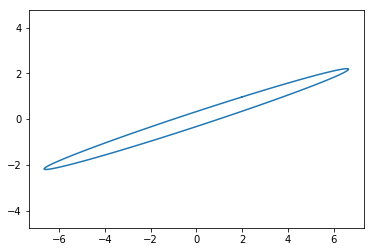

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 100) # return evenly spaced numbers over a specified interval
x = np.sin(theta)
y = np.cos(theta)
v = np.array([x, y]) # create 2 x 100 matrix
z = A @ v
plt.axes().set_aspect('equal', 'datalim')
plt.plot(z[0], z[1]);
plt.show()

We a bit more effort, we can print the eigenvectors scaled by their eigenvalues. This reveals the geometric role of the spectrum

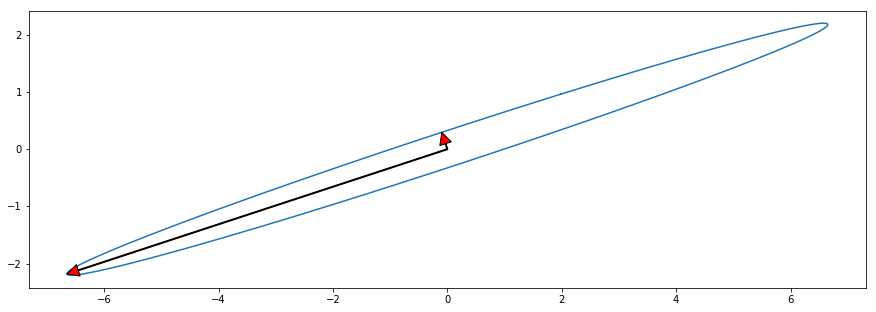

In [55]:
theta = np.linspace(0, 2*np.pi, 100)
x = np.sin(theta)
y = np.cos(theta)
z = A @ np.array([x, y])
start = np.array([0.0, 0.0])

fig, ax = plt.subplots()
fig.set_size_inches(15,15)
plt.plot(z[0], z[1]);

end = s[0] * U[:,0]
ax.annotate(
    '', xy=end, xycoords='data',
    xytext=start, textcoords='data',
    arrowprops=dict(facecolor='red', width=1.0))

end = s[1] * U[:,1]
ax.annotate(
    '', xy=end, xycoords='data',
    xytext=start, textcoords='data',
    arrowprops=dict(facecolor='red', width=1.0))

ax.set_aspect('equal')
plt.show()